# Compare CDE loss among experiments

In [15]:
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

/var/folders/10/x0l8lnh54ljfg007wm08z70h0000gv/T/ipykernel_83006/3085877373.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(experiment_data.keys()), rotation=45, fontsize = 15)


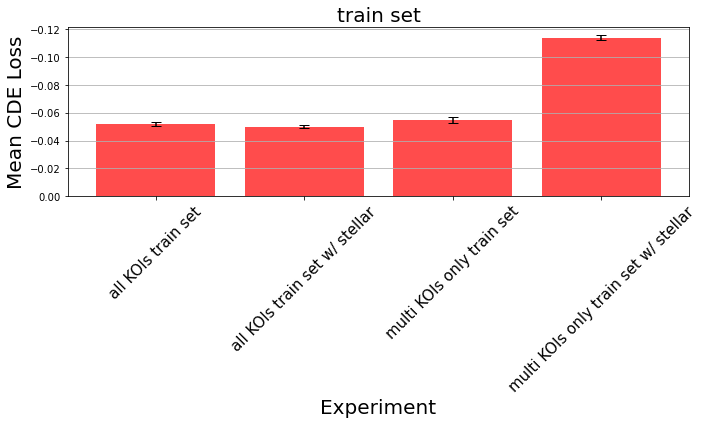

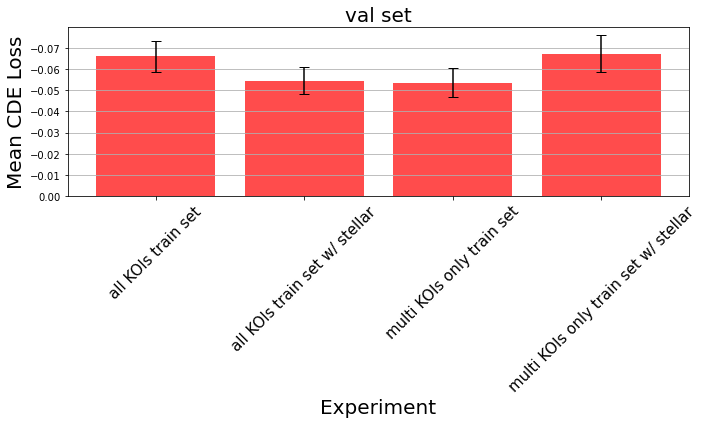

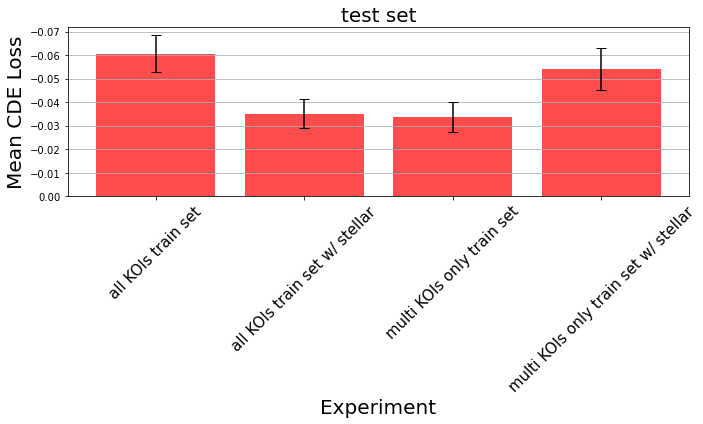

In [17]:
exp_root_dir = Path('/Users/msaragoc/Library/CloudStorage/OneDrive-NASA/Projects/multi_plnt_sys_probing/experiments/')

experiment_data = {
    'all KOIs train set': Path('/Users/msaragoc/Library/CloudStorage/OneDrive-NASA/Projects/multi_plnt_sys_probing/experiments/all_kois_nostellar_8-2-2023/metrics_alldatasets.csv'),
    'all KOIs train set w/ stellar': Path('/Users/msaragoc/Library/CloudStorage/OneDrive-NASA/Projects/multi_plnt_sys_probing/experiments/all_kois_withstellar_8-2-2023/metrics_alldatasets.csv'),
    'multi KOIs only train set': Path('/Users/msaragoc/Library/CloudStorage/OneDrive-NASA/Projects/multi_plnt_sys_probing/experiments/multis_kois_withstellar_8-2-2023/metrics_alldatasets.csv'),
    'multi KOIs only train set w/ stellar': Path('/Users/msaragoc/Library/CloudStorage/OneDrive-NASA/Projects/multi_plnt_sys_probing/experiments/multis_kois_nostellar_8-2-2023/metrics_alldatasets.csv'),
}

for dataset in ['train', 'val', 'test']:
    
    means = []
    stds = []
    
    for exp_name, fp in experiment_data.items():
        exp_df = pd.read_csv(fp)
        means.append(exp_df.loc[exp_df['dataset'] == f'{dataset}', 'mean_cde_loss'].values[0])
        stds.append(exp_df.loc[exp_df['dataset'] == f'{dataset}', 'std_cde_loss'].values[0])

    # Create the bar plot with error bars
    f, ax  = plt.subplots(figsize=(10, 6))  # Adjust the figure size if necessary
    ax.bar(list(experiment_data.keys()), means, yerr=stds, align='center', alpha=0.7, capsize=5, color='r', ecolor='black')
    ax.set_xlabel('Experiment', fontsize=20)
    ax.set_ylabel('Mean CDE Loss', fontsize=20)
    ax.set_title(f'{dataset} set', fontsize=20)
    ax.grid(axis='y')
    # Flip the graph 180 degrees by reversing the y-axis limits
    plt.gca().invert_yaxis()
    ax.set_xticklabels(list(experiment_data.keys()), rotation=45, fontsize = 15)
    # ax.set_yticklabels(fontsize = 20)
    f.tight_layout()
    f.savefig(exp_root_dir / f'bar_{dataset}_allexperiments.svg')
    plt.show()

In [19]:
# aggregate all metrics into a single csv file
experiments_res = []
for exp_name, fp in experiment_data.items():
    exp_df = pd.read_csv(fp)
    exp_df_cols = list(exp_df.columns)
    exp_df['experiment'] = exp_name
    exp_df = exp_df[['experiment'] + exp_df_cols]
    experiments_res.append(exp_df)

exp_df_allexps = pd.concat(experiments_res, axis=0, ignore_index=True)
exp_df_allexps.to_csv(exp_root_dir / 'metrics_all_experiments.csv', index=False)